# Explorary Data Analysis

## Import Basic Libraries 

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

## Data Cleaning and Preprocessing

In [2]:
vg = pd.read_csv("video_games_sales.csv")

vg = vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})

print(f"Distribution of the Variable and Data Types in the Dataset:\n{vg.info()}\n\n")
print(f"Columns Names in the Dataframe:\n{vg.columns.tolist()}\n\n")
print(f"Quantity of of null/missing data entries:\n{vg.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sales Rank                          16598 non-null  int64  
 1   name                                16598 non-null  object 
 2   platform                            16598 non-null  object 
 3   year                                16327 non-null  float64
 4   genre                               16598 non-null  object 
 5   publisher                           16540 non-null  object 
 6   North American Sales (in millions)  16598 non-null  float64
 7   European Sales (in millions)        16598 non-null  float64
 8   Japan Sales (in millions)           16598 non-null  float64
 9   Other Sales (in millions)           16598 non-null  float64
 10  Global Sales (in millions)          16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory

In [3]:
vg.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
North American Sales (in millions),16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
European Sales (in millions),16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
Japan Sales (in millions),16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other Sales (in millions),16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global Sales (in millions),16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


The table above shows the summary stats of the numerical variables in the datasets, each row is assigned to each variable.

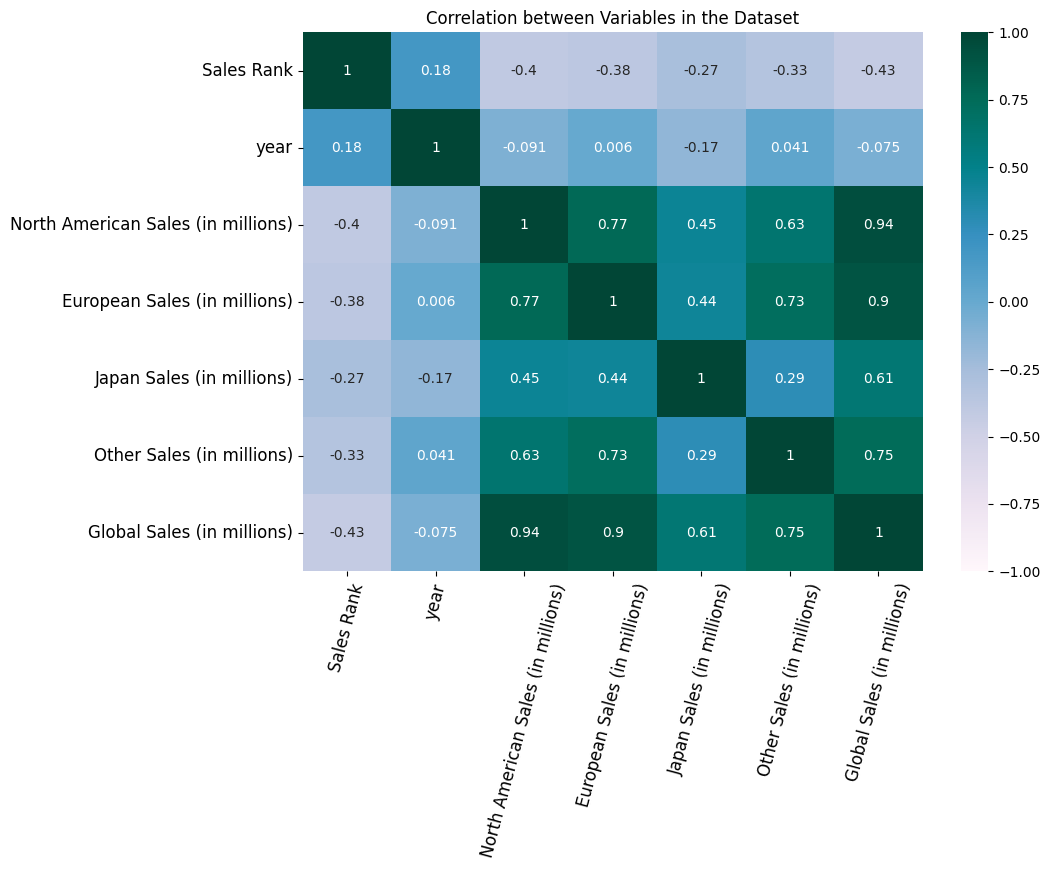

In [4]:
vg_numeric = vg.select_dtypes(include = ["int64","float64"])
corr_matrix = vg_numeric.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation between Variables in the Dataset")
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.show()

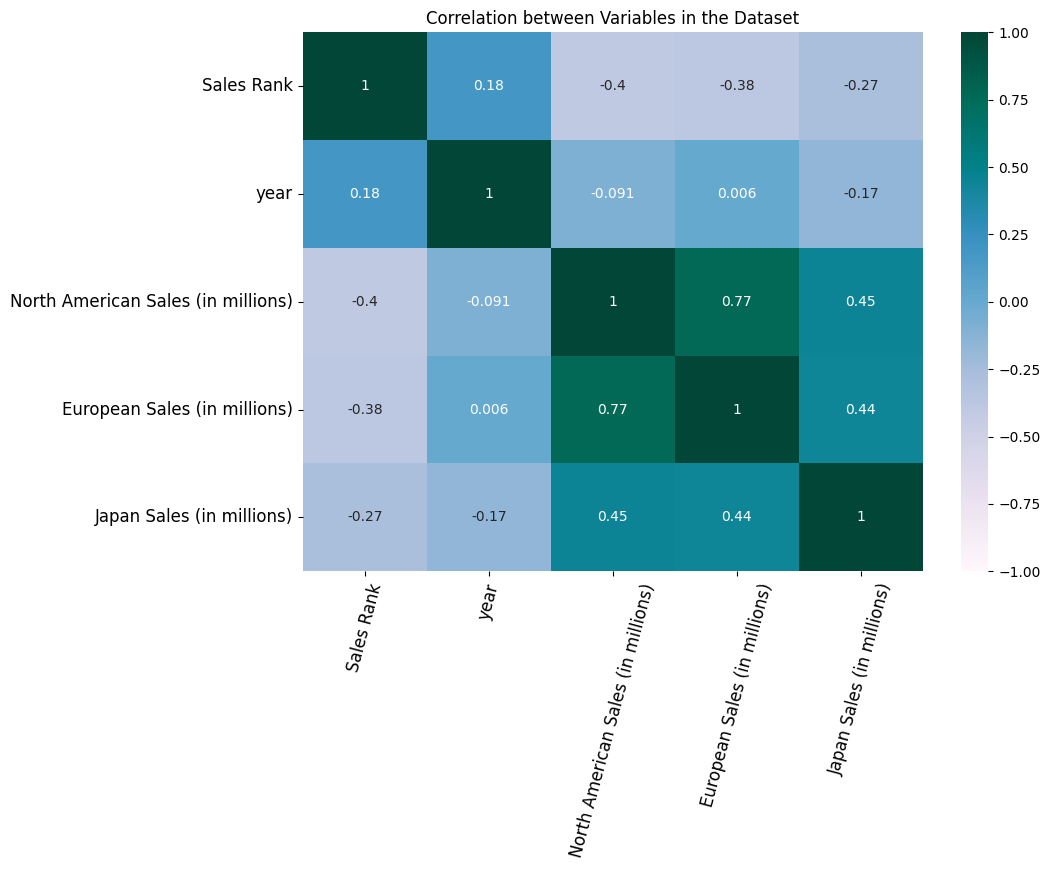

In [5]:
vg_refined = vg.drop(columns = ["Other Sales (in millions)", "Global Sales (in millions)"])
vg_numeric = vg_refined.select_dtypes(include = ["int64","float64"])
corr_matrix = vg_numeric.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation between Variables in the Dataset")
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.show()

## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
import sklearn.model_selection as ms
from sklearn import metrics
from sklearn import tree

In [7]:
X = vg_refined.drop(columns = ["North American Sales (in millions)"])
Y = vg_refined["North American Sales (in millions)"]
print(f"Dimensionality of the Predictors:\n{X.shape}\n")
print(f"Dimensionality of the Response Variable:\n{Y.shape}\n")
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

Dimensionality of the Predictors:
(16598, 8)

Dimensionality of the Response Variable:
(16598,)



In [8]:
na_decision = DecisionTreeRegressor(random_state = 123) #DecisionTreeRegressor is made for continuous variables 
na_decision.fit(X_train, Y_train)
y_pred = na_decision.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)  #Mean Squared Error is a common metric for regression
print(f"Mean Squared Error: {mse:.5f}\n")

r2 = r2_score(Y_test, y_pred) #Evaluates the model accuracy
print(f"R² Score: {r2:.5f}")

Mean Squared Error: 0.04070

R² Score: 0.93807


In [9]:
cross_val_r2 = cross_val_score(na_decision, X, Y, cv=5, scoring='r2')
print(f"Cross-validated R² Scores: {cross_val_r2}\n")
print(f"Mean Cross-validated R²: {cross_val_r2.mean():.5f}\n")
print(f"Standard Deviation of R² Scores: {cross_val_r2.std():.5f}\n")

Cross-validated R² Scores: [-0.29012313 -0.04795389 -1.02860387  0.09646139 -3.11057255]

Mean Cross-validated R²: -0.87616

Standard Deviation of R² Scores: 1.18247



In [10]:
depth_val = np.arange(2,11)
leaf_val = np.arange(1,31, step=10)

grid_s = [{'max_depth': depth_val,'min_samples_leaf': leaf_val}]
model = tree.DecisionTreeRegressor(criterion='friedman_mse')

cv_tree = GridSearchCV(estimator=model,param_grid=grid_s,cv=ms.KFold(n_splits=10))
cv_tree.fit(X_train, Y_train)

best_depth = cv_tree.best_params_['max_depth']

best_min_samples = cv_tree.best_params_['min_samples_leaf']

print(best_depth, best_min_samples)

final_model = tree.DecisionTreeRegressor(
    criterion='friedman_mse',
    max_depth=best_depth,
    min_samples_leaf=best_min_samples,
    random_state=123
)
final_model.fit(X_train, Y_train)

10 1


DecisionTreeRegressor(criterion='friedman_mse', max_depth=np.int64(10),
                      min_samples_leaf=np.int64(1), random_state=123)

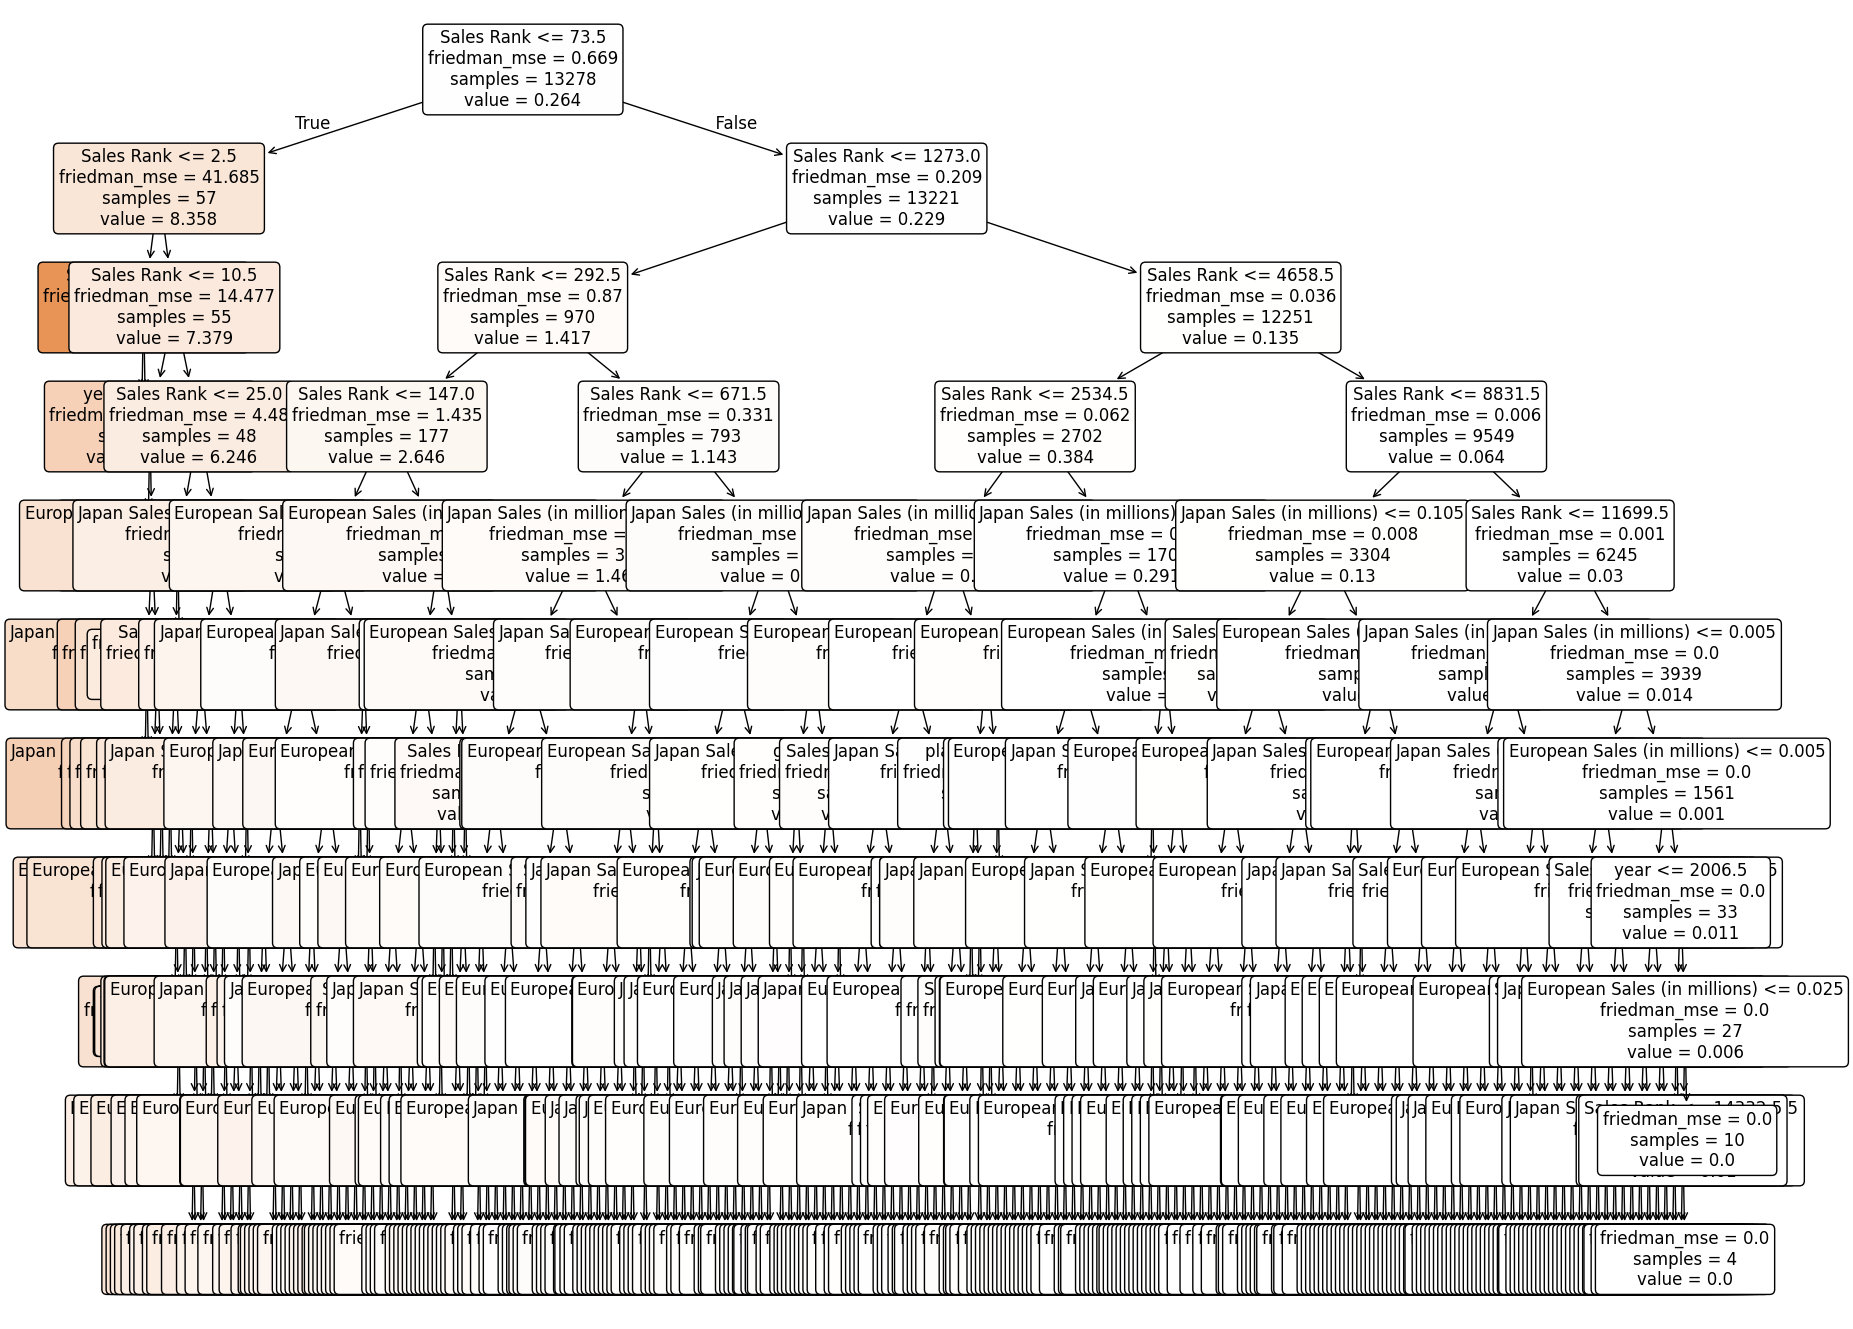

In [11]:
plt.figure(figsize=(20,17))
tree.plot_tree(
    final_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
#plt.savefig("Feature Importance in Predicting North American Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

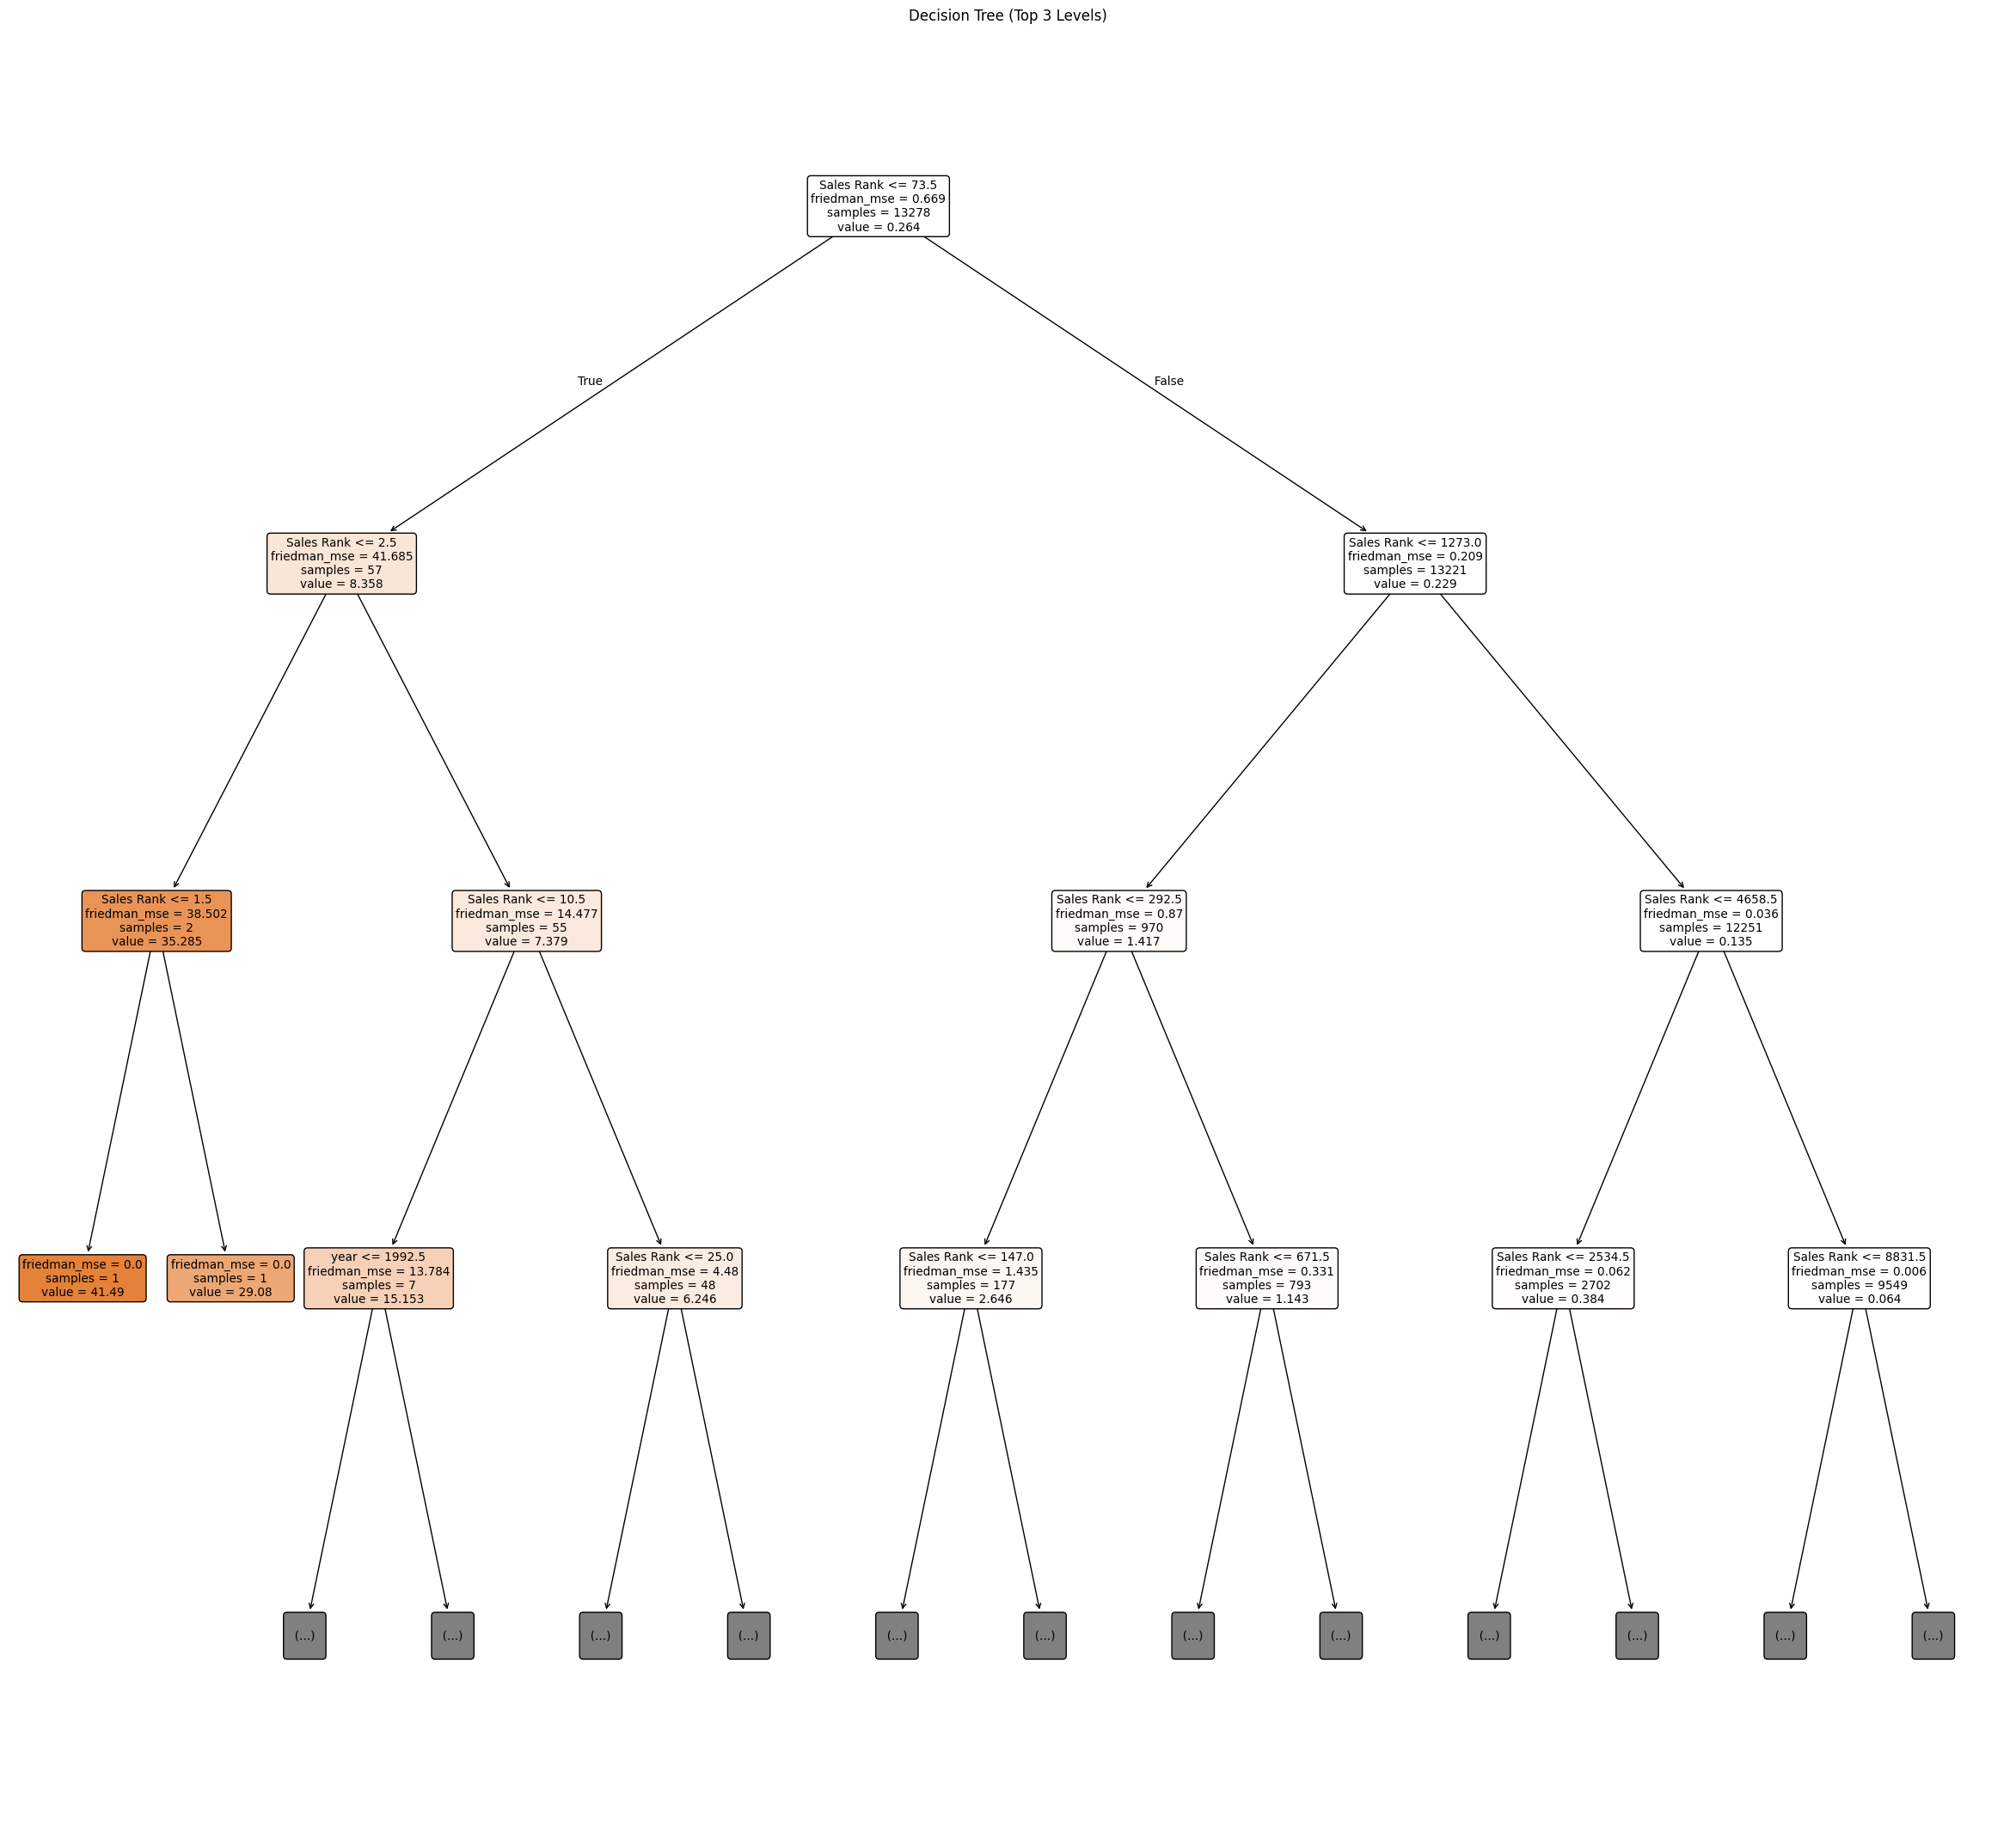

In [12]:
plt.figure(figsize=(30,27))
tree.plot_tree(final_model, max_depth=3, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

In [13]:
# Predictions
Y_pred = final_model.predict(X_test)

# Metrics
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.5f}")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")

R² Score: 0.93639
MSE: 0.04180
RMSE: 0.20446
